In [54]:
import blocksci
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np
%matplotlib notebook

# parser_data_directory should be set to the data-directory which the blocksci_parser output
chain = blocksci.Blockchain("/blocksci/bitcoin.json")

In [55]:
# Find all transactions that inputted into 1Fs

# 1. find active timeframe for 1Fs
# 2. find/plot # of addresses that aggregate into 1Fs 
# 3. find/plot time between aggregation transaction into 1Fs and then that BTC being spent
# 4. find/plot time between initial BTC-E wallet receiving money and then getting aggregated
# 5. find/plot amount of bitcoin that gets aggregated into 1Fs each time
# 6. find if the aggregation wallets are "fresh" - created within x time of getting used in aggregation
# or the number of transactions the aggregation wallets have, total

# this is a model to model BTC-e transactions that follow the 1Fs pattern. (aggregation)
# then run this model on the entire blockchain and see if that maps to BTC-E transactions
# improve the model with the addition of peel chain detection


In [56]:
address = chain.address_from_string("1FsVcdeHbpvUVT3gjeuVR2ZSDnpcsJMsLL")
# cluster = cm.cluster_with_address(address)

# get all transactions where 1Fs is an output (these should be BTC-E aggregation transactions)
# let's call all aggregation inputs into 1Fs as "AggIns"
address.out_txes_count() # returns a list of transactions

# Blockchain.info: 30379 total transactions, both in and out

15783

In [57]:
address.in_txes_count() # where 1Fs spent money!

14596

In [58]:
# this is a list of all the aggregation transactions
allTx = address.out_txes
allAggIns = address.out_txes.input_count

In [59]:
# iterate across transactions, and count # of addresses 
# we know that these probably all are BTC-E
sum(allAggIns)

308730

In [60]:
%time inputs = allAggIns
times = allTx.block_time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.2 µs


<IPython.core.display.Javascript object>


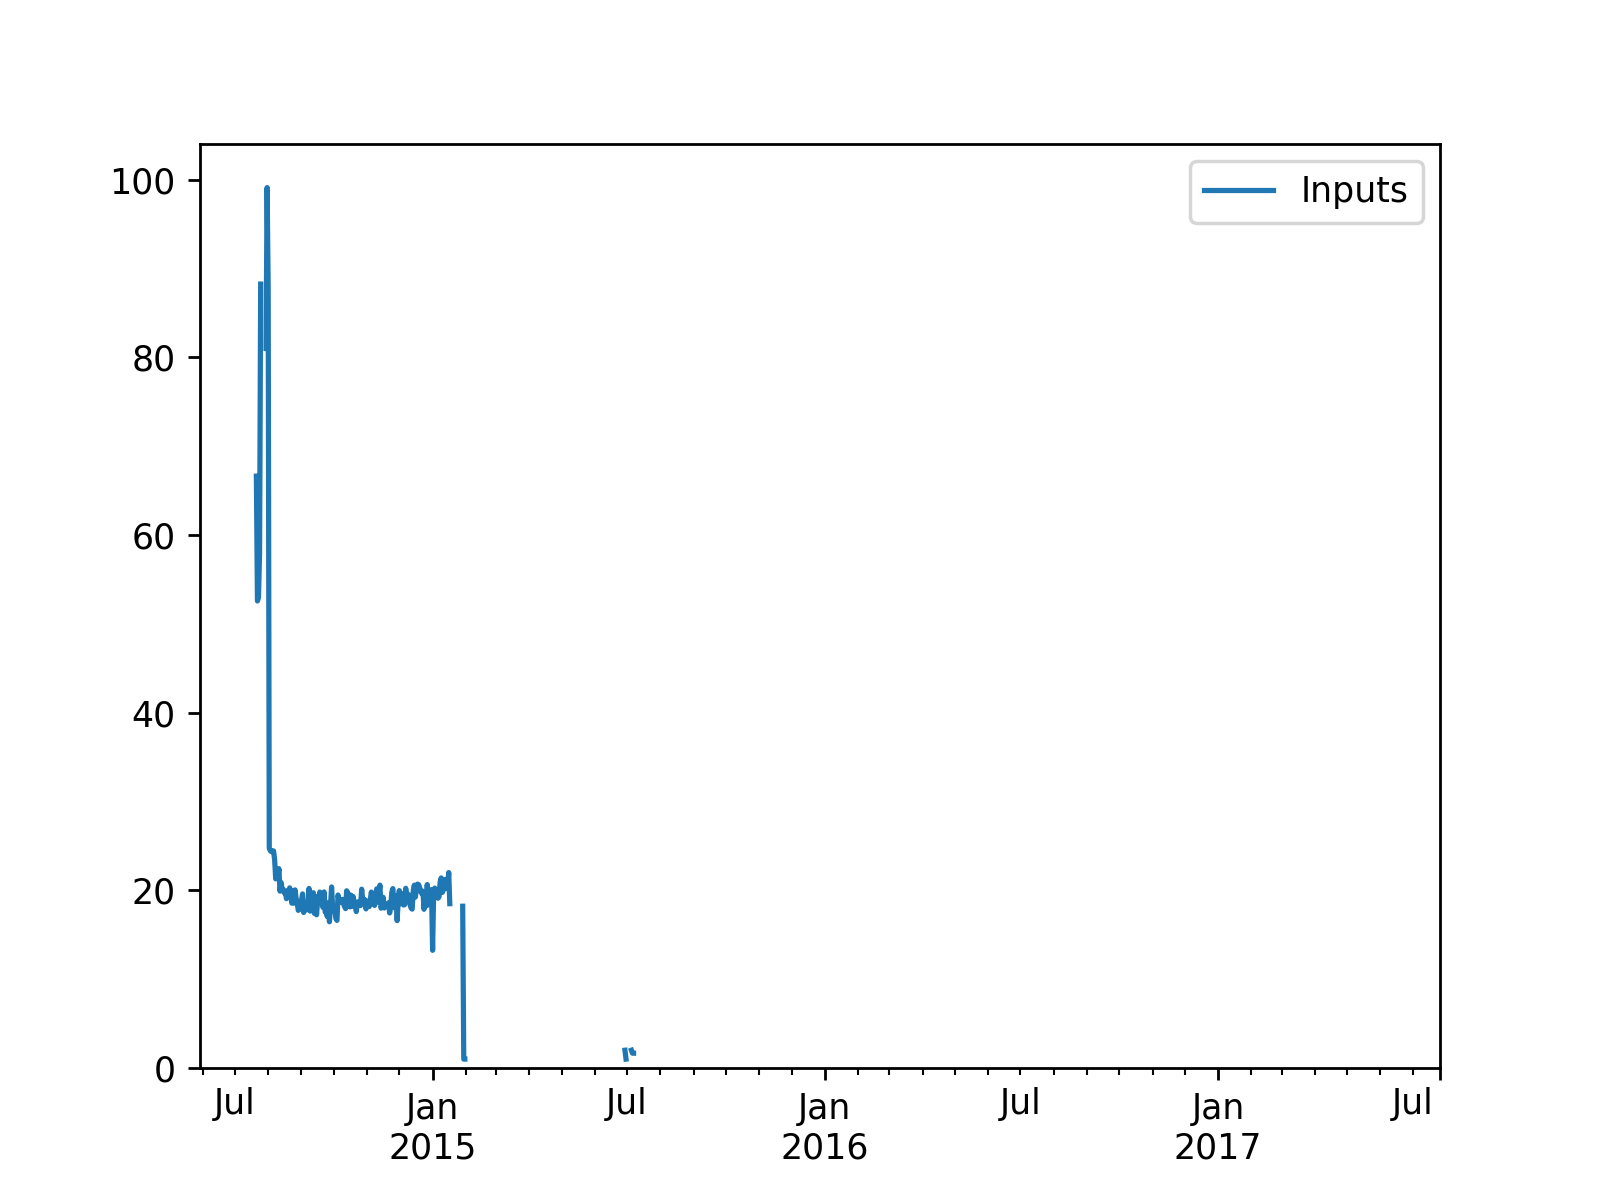

[]

In [66]:
# 2. find the average # of inputs
# plot this, as # of inputs, over time

# allAggIns is a list of transactions that I need to plot

df = pd.DataFrame({"Inputs":inputs}, index=times)
ax = df.resample("d").mean().plot()
ax.set_ylim(0)
plt.plot()

In [83]:
# 1 plot the # of transactions over time for 1Fs
allTxList = address.txes() # This is a list and not a tx Iterator object? how to get the date?

In [ ]:
# 3. find/plot time between aggregation transaction into 1Fs and then that BTC being spent
# the time of the transaction, to the next transaction after (where it's spent)


In [ ]:
# 4. find/plot time between initial BTC-E wallet receiving money and then getting aggregated


In [85]:
# 5. find/plot amount of bitcoin that gets aggregated into 1Fs each time
allTx = address.out_txes
allAggIns = address.out_txes.input_value

print(allAggIns)

sum(allAggIns)


# according to blockchain.info, amount of received BTC = 652,354.17043337 BTC


[   10010000 20296546207  3098676731 ...     8934046     2105902
       15000]


65806214505987

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


<IPython.core.display.Javascript object>


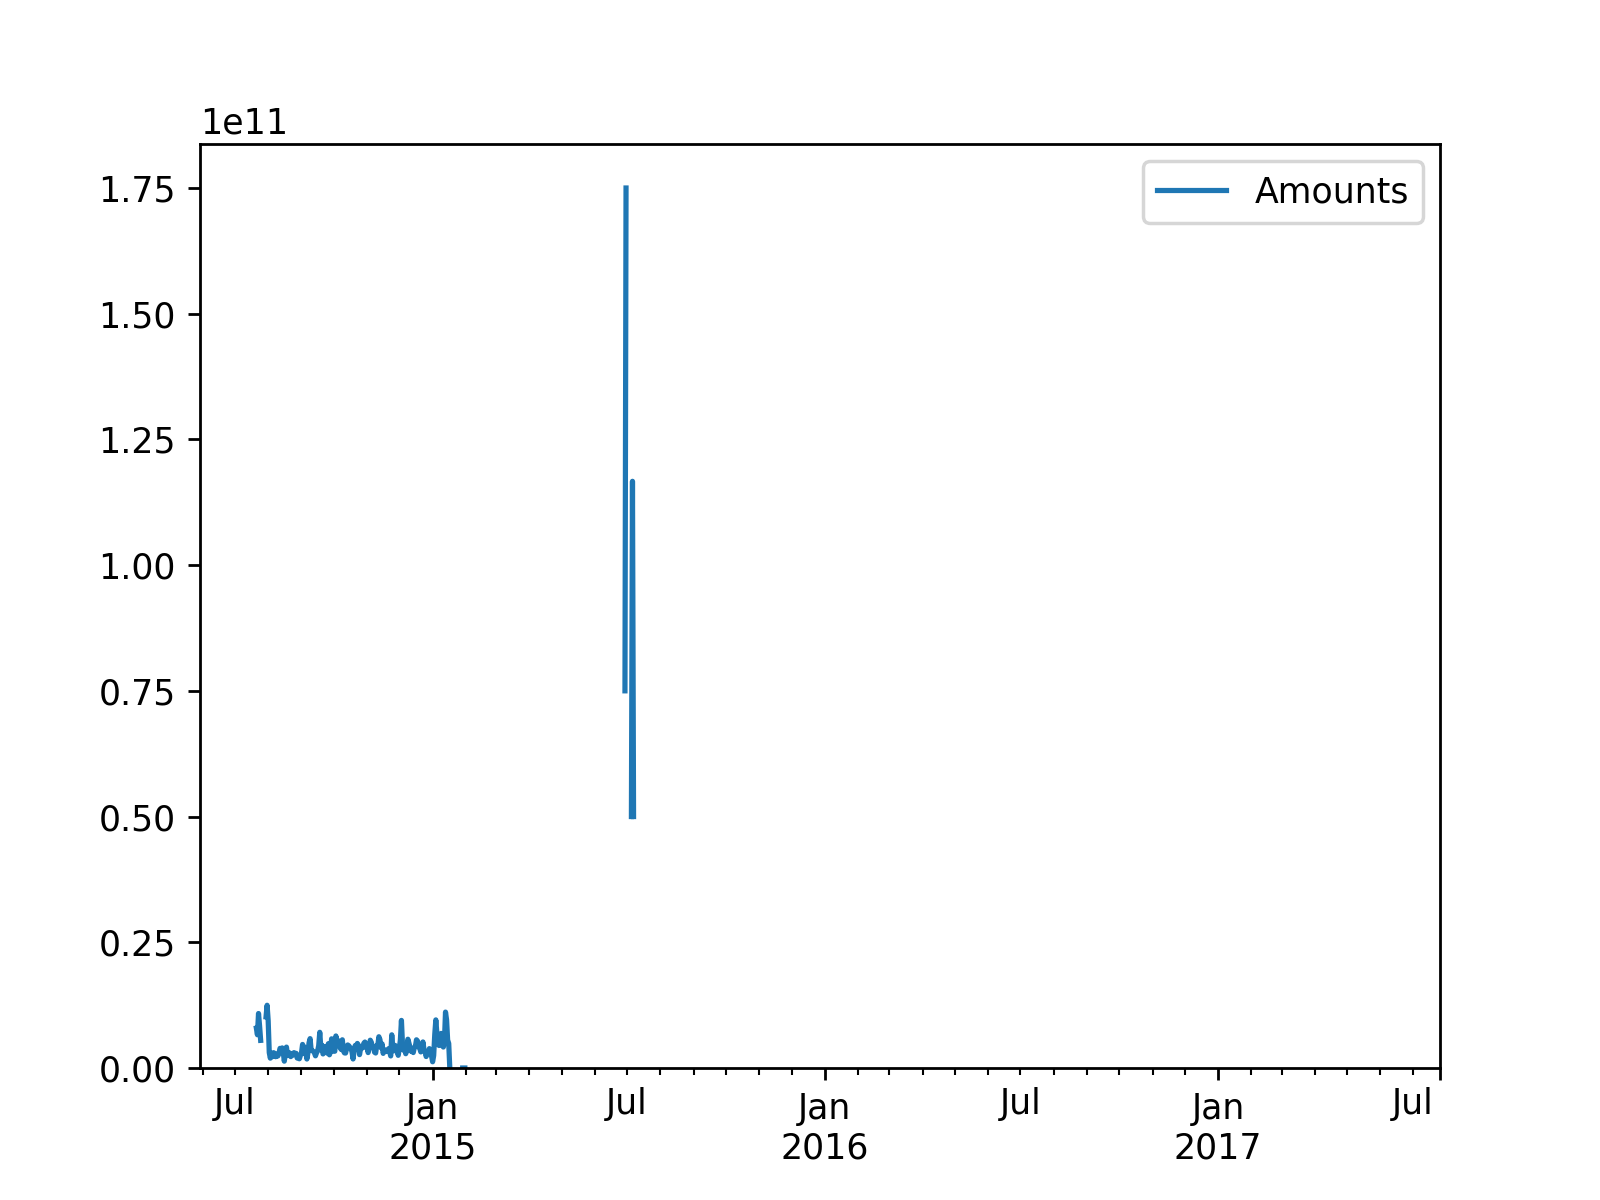

[]

In [86]:
%time amounts = allAggIns
times = allTx.block_time

df = pd.DataFrame({"Amounts":amounts}, index=times)
ax = df.resample("d").mean().plot()
ax.set_ylim(0)
plt.plot()

In [ ]:
# 6. find if the aggregation wallets are "fresh" - created within x time of getting used in aggregation
# or the number of transactions the aggregation wallets have, total


In [ ]:
# 7. amount of bitcoin each aggregation wallet contributes as input